In [1]:
import nltk

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> Q


In [3]:
# we will be using a dataset frpom the UCI dataset

In [3]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [4]:
print(len(messages))

5574


In [5]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [6]:
import pandas as pd

In [7]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep = '\t', names=['label', 'message'])

In [8]:
messages.head() 

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
for message_no, message in enumerate(messages[:10]):
    print(message_no, message)
    print('\n')


0 label


1 message




In [26]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [33]:
# calling describe on dataframe

In [34]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [35]:
# we will use group by to geta higher level view of the dataset

In [11]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [37]:
# Most popular ham message is "Sorry, I'll call later "
# Most popular spam message is "Please call our customer service representativ"

In [38]:
# we need to think about the features we are going to be using
# A large part of NLP is going to be feature_engineering
# the more your knowledge/domain knowledge about data, the better your abimity to engineer more features form it
# Very important for spam detection

In [39]:
# Creating a new column to detect hoe large a text message are

In [12]:
messages['length'] = messages['message'].apply(len)

In [13]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [14]:
# lets visualize the length of the message

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

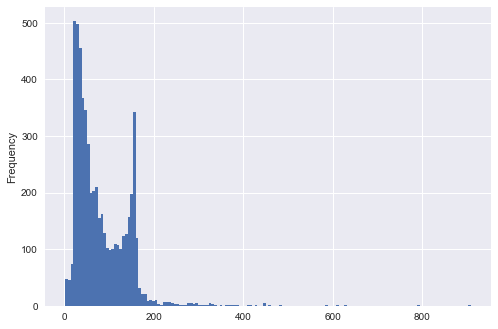

In [16]:
messages['length'].plot.hist(bins=150)
plt.show()

In [49]:
# We can see there are some text messages with length more than 800, lets see them

In [17]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [18]:
# there iis messge with max length of 910
# let go ahead an view that message

In [21]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [22]:
# this si kind of a wierd love letter

In [23]:
# lets explore outliers

In [24]:
# histogram

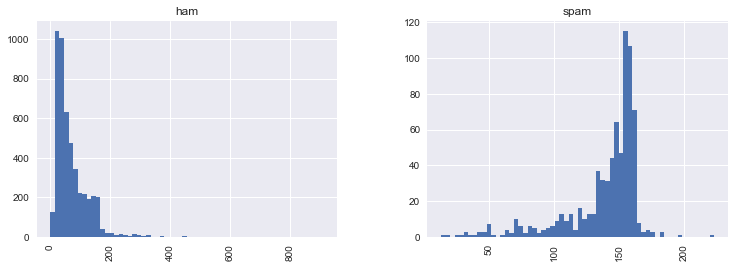

In [25]:
messages.hist(column='length', by='label', bins=60, figsize=(12,4))
plt.show()

In [66]:
# on the X axis we have length of the messages
# on the y axis we have count of those messages
# as we can see here is a trend, most of the ham messages have low length, around 50
# most fo the spam messages have higher length , around 150

In [26]:
# now we will covert raw messages which are a sequence of characters into a vectors : a sequence of numbers

In [27]:
# split the message into individual words and then return a list

In [28]:
import string
# first thing we want to do is remove punctuations

In [29]:
mess = 'Sample Message! Notice: it has punctuation.'

In [30]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [31]:
# Now I can use list comprehension in order to pass on for every character and check 
# if it is not in the string punctuation

In [33]:
nopunc = [c for c in mess if c not in string.punctuation]

In [34]:
 nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'M',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [35]:
 # punctuations removed

In [36]:
from nltk.corpus import stopwords

In [37]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [38]:
nopunc = ''.join(nopunc)

In [39]:
nopunc

'Sample Message Notice it has punctuation'

In [40]:
nopunc.split()

['Sample', 'Message', 'Notice', 'it', 'has', 'punctuation']

In [41]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [42]:
clean_mess

['Sample', 'Message', 'Notice', 'punctuation']

In [43]:
# lets put this remving punctuations and removing stop words into a nice fucntion 
# so that we can apply this to our entire dataset

In [44]:
def text_process(mess):
    """
    1. remove punctuations
    2. remove stopwords
    3. return list of clean text words
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [45]:
# we will tokenize these messages
# cleaned  version of the words

In [46]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [47]:
# these are tokenized version

In [48]:
# this is a very simple version of tokenization
# NLTK library has very great tools to performt this
# for example STEMMING is a very common way to continue processing data

In [49]:
# Stemming : Running, ran , run
# stemming will return Run
# some of these text processing methods have trouble with short hand
# and we have a lot of short hand in our data like Nah, U, C etc

In [50]:
# vectorization!!

In [51]:
# we will be using bag of words methods to calculate
# 1. term frequency
# 2. TFIDF
# we will be using sklearn's CountVectorizer
# this will give us a matrix with all the words in vocab as rows and 
# all the messages a columns and counts will be the data
# this will outout a sparse matrix : lot of zero values

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

In [53]:
bow_transformer = CountVectorizer(analyzer = text_process).fit(messages['message'])

In [54]:
# lets check how many words we have in our vocablary

In [55]:
print(len(bow_transformer.vocabulary_))

11425


In [56]:
mess4 = messages['message'][3]

In [57]:
print(mess4)

U dun say so early hor... U c already then say...


In [58]:
bow4 = bow_transformer.transform([mess4])

In [59]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [62]:
print(bow4.shape)

(1, 11425)


In [63]:
bow_transformer.get_feature_names()[4068]

'U'

In [64]:
bow_transformer.get_feature_names()[9554]

'say'

In [65]:
# transform the entire dataset

In [67]:
messages_bow = bow_transformer.transform(messages['message'])

In [68]:
print('Shape of matrix : ', messages_bow.shape)

Shape of matrix :  (5572, 11425)


In [70]:
messages_bow.nnz # non zero occurances

50548

In [71]:
# we can also check the sparcity

In [74]:
# TFIDF transformer from sklearn

In [75]:
from sklearn.feature_extraction.text import TfidfTransformer

In [76]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [79]:
tfidf4 = tfidf_transformer.transform(bow4)

In [80]:
print(tfidf4) # these are weight values for each of these words vs the actual document

  (0, 9554)	0.538562626293
  (0, 7186)	0.438936565338
  (0, 6222)	0.318721689295
  (0, 6204)	0.299537997237
  (0, 5261)	0.297299574059
  (0, 4629)	0.266198019061
  (0, 4068)	0.408325899334


In [81]:
# to check TFIDF value for a particulat word:


In [82]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [83]:
# now lets convert entire bow corpus into tfidf at once

In [84]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [85]:
# we will be using Naive Bayes classifier

In [86]:
from sklearn.naive_bayes import MultinomialNB

In [87]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [89]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [90]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [91]:
# we just used all our data for training, amnd we should not do that
# we should always do train test split
# lets go ahead and do that

In [92]:
from sklearn.cross_validation import train_test_split

In [93]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size = 0.3)

In [94]:
#  the above data contains plain text messages without any processing that we just did above
# no bow, no tf, no tfidf
# so one way is to do all this again
# or we can use sklearn;s pipeline feature

In [95]:
from sklearn.pipeline import Pipeline

In [96]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer = text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [98]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x1179e0c80>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [99]:
predictions = pipeline.predict(msg_test)

In [100]:
from sklearn.metrics import classification_report

In [101]:
print(classification_report(label_test, predictions))

             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      1449
       spam       1.00      0.74      0.85       223

avg / total       0.97      0.96      0.96      1672

